# Practical 11: Clustering(KMeans), KNN Classifier



## KNN Classifier
The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems. (K-NN) algorithm is a versatile and widely used machine learning algorithm that is primarily used for its simplicity and ease of implementation. It does not require any assumptions about the underlying data distribution. It can also handle both numerical and categorical data, making it a flexible choice for various types of datasets in classification and regression tasks.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS/Data/clean_car_evaluation.csv")

In [4]:
X = df.drop(columns=['decision'])
y = df['decision']

In [5]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = onehot_encoder.fit_transform(X)
encoded_X = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(X.columns))
encoded_X

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,buying_price_low,buying_price_med,buying_price_vhigh,maintenance_cost_low,maintenance_cost_med,maintenance_cost_vhigh,doors_3,doors_4,doors_5more,seats_4,seats_more,boot_space_med,boot_space_small,safety_low,safety_med
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1724,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1726,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1157, 15), (571, 15), (1157,), (571,))

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)

acc

0.8458844133099825

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 92,   6,  31,   0],
       [ 17,   1,   2,   0],
       [  9,   0, 388,   0],
       [ 10,   8,   5,   2]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.72      0.71      0.72       129
        good       0.07      0.05      0.06        20
       unacc       0.91      0.98      0.94       397
       vgood       1.00      0.08      0.15        25

    accuracy                           0.85       571
   macro avg       0.67      0.46      0.47       571
weighted avg       0.84      0.85      0.83       571



## K-Means Clustering
The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.

How k-means clustering works?
We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm, an unsupervised learning algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into. The algorithm will categorize the items into k groups or clusters of similarity.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

In [ ]:
X.shape, y.shape

((300, 2), (300,))

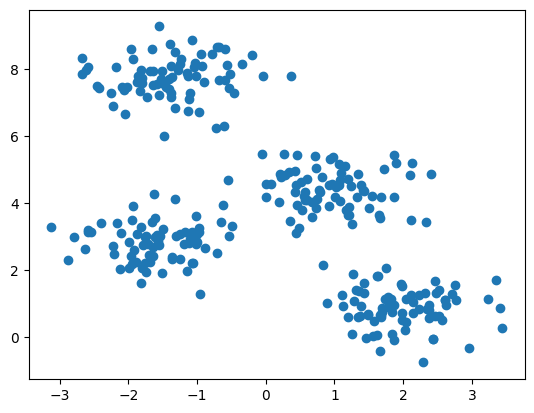

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
wcss = []

for i in range(1, 11):
  kMeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, random_state=0)
  kMeans.fit(X)
  wcss.append(kMeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

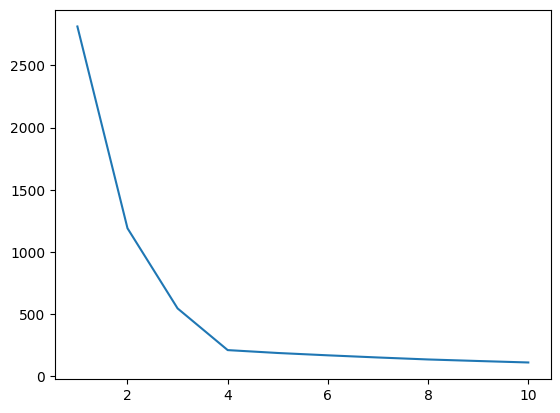

In [ ]:
plt.plot(range(1, 11), wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


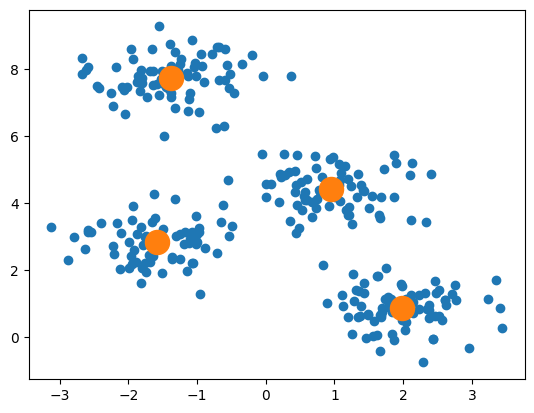

In [ ]:
kMeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, random_state=0)
pred_y = kMeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], s=300)